In [8]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datetime import datetime



In [9]:
def load_results(results_file):
    """Load results from JSON file"""
    with open(results_file, 'r') as f:
        return json.load(f)

def analyze_results(results, optimal_score):
    """Analyze results and return statistics"""
    stats = {}
    
    for method_key, trials in results.items():
        # Extract best scores and histories
        best_scores = [trial['best_score'] for trial in trials]
        score_histories = [trial['best_score_history'] for trial in trials]
        
        # Calculate average scores across trials
        avg_scores = np.mean([np.mean(history) for history in score_histories])
        
        # Calculate average number of steps to best solution
        avg_steps = np.mean([len(history) for history in score_histories])
        
        # Calculate optimality gap
        gaps = [(score - optimal_score)/optimal_score * 100 for score in best_scores]
        avg_gap = np.mean(gaps)
        
        # Calculate statistics
        stats[method_key] = {
            'mean_score': np.mean(best_scores),
            'std_score': np.std(best_scores),
            'min_score': np.min(best_scores), 
            'max_score': np.max(best_scores),
            'avg_score': avg_scores,
            'avg_steps': avg_steps,
            'optimality_gap': avg_gap
        }
    
    return stats

def plot_convergence(results):
    """Plot convergence curves for all methods"""
    plt.figure(figsize=(12, 6))
    
    for method_key, trials in results.items():
        # Plot each trial
        for i, trial in enumerate(trials):
            if trial['best_score_history']:
                plt.plot(trial['best_score_history'], 
                        label=f'{method_key} (Trial {i+1})',
                        alpha=0.7)
    
    plt.xlabel('Step')
    plt.ylabel('Best Score')
    plt.title('TSP Optimization Convergence')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_method_comparison(stats):
    """Plot comparison of methods using box plots"""
    methods = list(stats.keys())
    scores = []
    for method_key in methods:
        method_scores = [trial['best_score'] for trial in results[method_key]]
        scores.append(method_scores)
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=methods, y=np.concatenate(scores))
    plt.xticks(rotation=45)
    plt.xlabel('Method')
    plt.ylabel('Best Score')
    plt.title('Method Comparison')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def print_statistics(stats):
    """Print statistical analysis results"""
    print("\nStatistical Analysis:")
    print("=" * 80)
    print(f"{'Method':<30} {'Mean Score':<15} {'Std Dev':<15} {'Success Rate':<15}")
    print("-" * 80)
    
    for method_key, stat in stats.items():
        print(f"{method_key:<30} {stat['mean_score']:>15.2f} {stat['std_score']:>15.2f} {stat['success_rate']:>15.2%}")



In [10]:
# Get the most recent results file
results_dir = Path('results')
results_files = list(results_dir.glob('tsp_results_*.json'))


latest_file = max(results_files, key=lambda x: x.stat().st_mtime)
print(f"Analyzing results from: {latest_file}")



Analyzing results from: results/tsp_results_20250313.json


In [11]:
# Load and analyze results
results = load_results(latest_file)
stats = analyze_results(results, optimal_score=290.22)



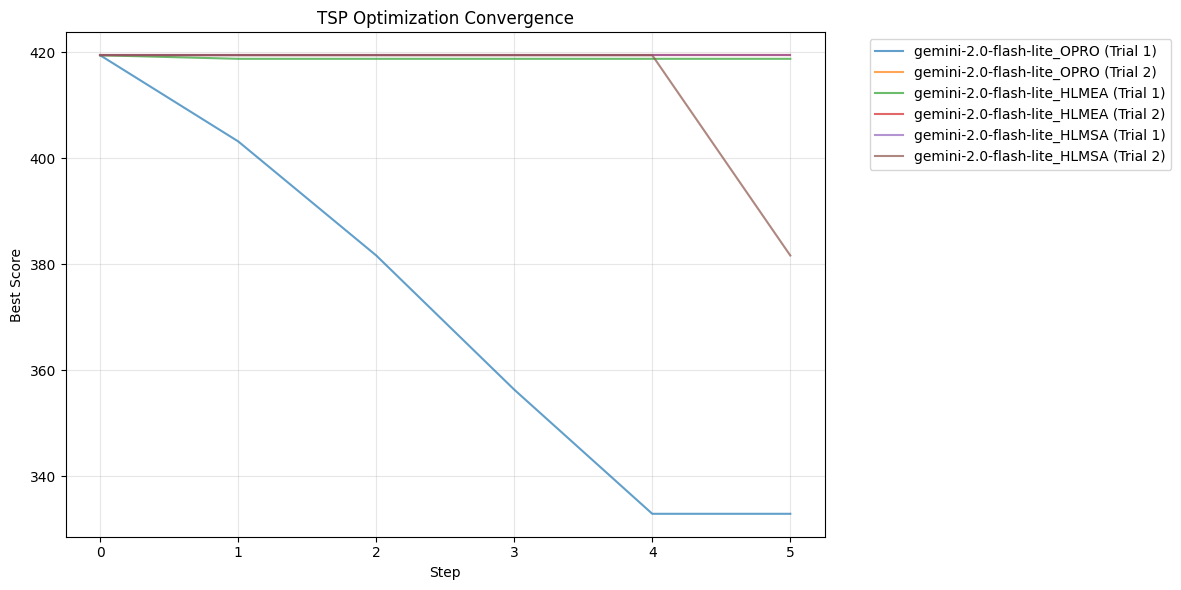

In [12]:
# Generate visualizations
plot_convergence(results)


In [13]:
plot_method_comparison(stats)



ValueError: All arrays must be of the same length

<Figure size 1000x600 with 0 Axes>

In [14]:
# Print statistics
print_statistics(stats)


Statistical Analysis:
Method                         Mean Score      Std Dev         Success Rate   
--------------------------------------------------------------------------------
gemini-2.0-flash-lite_OPRO              376.18           43.24          50.00%
gemini-2.0-flash-lite_HLMEA             419.08            0.34          50.00%
gemini-2.0-flash-lite_HLMSA             400.53           18.88          50.00%
